# *ANN -Artificial Neural Network*

### *Analysis objective :<br>Applying -ANN- model on the prediction of -gender- as a target Feature*
---

In [1]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
matplotlib.rcParams["figure.figsize"]=(20,10)
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder_category=LabelEncoder()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import (r2_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix)
import warnings
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:/Users/Omar\Desktop/Omar_Files/Python_Analysis/DeepLearning_ANN/DataSet/data_car.csv")
df=df.drop(["X_OBSTAT_","clm","numclaims"],axis=1)
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0.0,UTE,2,F,E,2
3,4.14,0.317591,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0.0,HBACK,4,F,C,2


In [3]:
df=df.sort_values(by=['veh_age', 'agecat','area','gender']).reset_index().drop("index",axis=1)
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.59,0.229979,0.0,SEDAN,1,F,A,1
1,1.46,0.221766,0.0,HBACK,1,F,A,1
2,1.54,0.238193,0.0,SEDAN,1,F,A,1
3,1.57,0.522930,0.0,SEDAN,1,F,A,1
4,1.41,0.219028,0.0,HBACK,1,F,A,1


---

In [4]:

categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 3 numerical features : ['veh_value', 'exposure', 'claimcst0']

we have 5 categorical features : ['veh_body', 'veh_age', 'gender', 'area', 'agecat']


In [5]:
discrete_feature=[feature for feature in numerical_features if  len(df[feature].unique())<=25]
countinuous_feature=[feature for feature in numerical_features if  len(df[feature].unique())>25]

In [6]:
print("we have {} discrete feature : {}\n".format(len(discrete_feature),(discrete_feature)))
print("we have {} countinuous feature : {}".format(len(countinuous_feature),(countinuous_feature)))

we have 0 discrete feature : []

we have 3 countinuous feature : ['veh_value', 'exposure', 'claimcst0']


In [7]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

In [9]:
x=df.drop("veh_age",axis=1)
y=df["veh_age"]

In [10]:
x[countinuous_feature].skew(axis=0,skipna=True)

veh_value     2.968022
exposure      0.175557
claimcst0    17.502503
dtype: float64

In [11]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
transform_features=['veh_value']
df[transform_features]=pt.fit_transform(x[transform_features])

In [12]:
df[transform_features].skew(axis=0,skipna=True)

veh_value    0.010369
dtype: float64

In [13]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt=SMOTEENN(random_state=42,sampling_strategy="minority")
x_re,y_res=smt.fit_resample(x,y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_re,y_res ,test_size= 0.2,random_state=42)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (21360, 7) and Y = (21360,) : 
Test data shape of X = (5340, 7) and Y = (5340,) : 


In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

* *Importing Tensorflow :*

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

* *Model Preparation :*

In [18]:
classifier=Sequential()

* *1st Hidden Layer :*

In [19]:
classifier.add(Dense(units=7,activation="ReLU"))

* *2nd Hidden Layer :*

In [20]:
classifier.add(Dense(units=14,activation="ReLU"))

* *Last Layer -Output :*

In [21]:
classifier.add(Dense(4,activation="softmax"))

* *Adam Optimizer Preparation :*

In [22]:
import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

* *Compiling the Model :*

In [23]:
classifier.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# categorical_crossentropy

* *Early Stopping Preparation :*

In [24]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

* *Model Fitting :*

In [25]:
model_history=classifier.fit(x_train,y_train,validation_split=.33,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


448/448 [==============================] - 2s 2ms/step - loss: 0.6370 - accuracy: 0.7513 - val_loss: 0.5175 - val_accuracy: 0.7994
Epoch 2/1000
448/448 [==============================] - 1s 2ms/step - loss: 0.4906 - accuracy: 0.8187 - val_loss: 0.4912 - val_accuracy: 0.8187
Epoch 3/1000
448/448 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8428 - val_loss: 0.4419 - val_accuracy: 0.8422
Epoch 4/1000
448/448 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8604 - val_loss: 0.3893 - val_accuracy: 0.8624
Epoch 5/1000
448/448 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8662 - val_loss: 0.3567 - val_accuracy: 0.8764
Epoch 6/1000
448/448 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8765 - val_loss: 0.3181 - val_accuracy: 0.8849
Epoch 7/1000
448/448 [==============================] - 1s 2ms/step - loss: 0.3166 - accuracy: 0.8838 - val_loss: 0.3288 - val_accurac

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

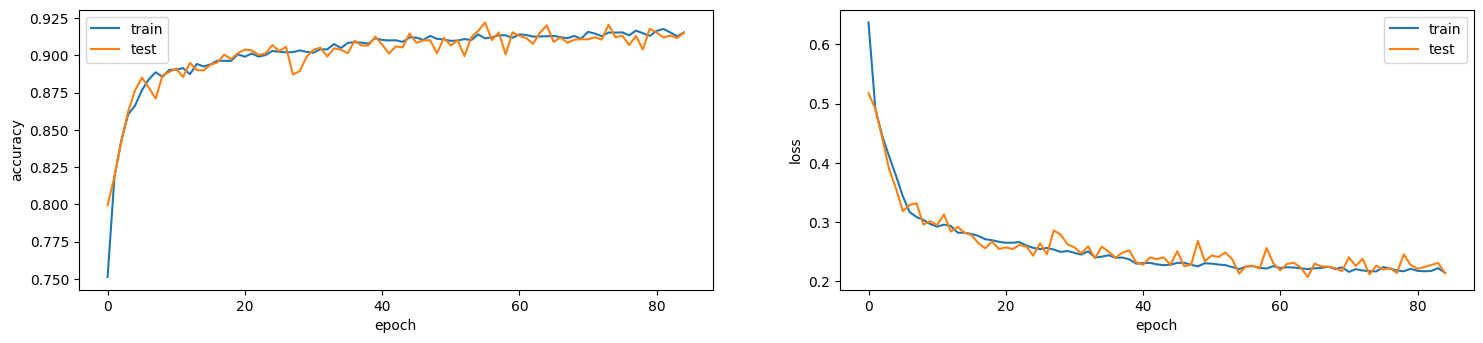

In [27]:
plt.figure(figsize=(18, 8))
plt.subplot(221)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"]);


plt.subplot(222)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"]);

In [28]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 4)                 60        
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
y=classifier.predict(x_test)

167/167 [==============================] - 0s 1ms/step


In [30]:
classifier.evaluate(x_test, y_test)

167/167 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9124


[0.2508167326450348, 0.9123595356941223]

In [31]:
accuracy = classifier.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy[1]}")

167/167 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.9124
Test accuracy: 0.9123595356941223


In [32]:
import numpy as np
predicted_classes = np.argmax(y, axis=1)
len(predicted_classes)

5340

In [33]:
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1714   61   23    2]
 [ 209  264   21    1]
 [  35   38  893   60]
 [   2    1   15 2001]]


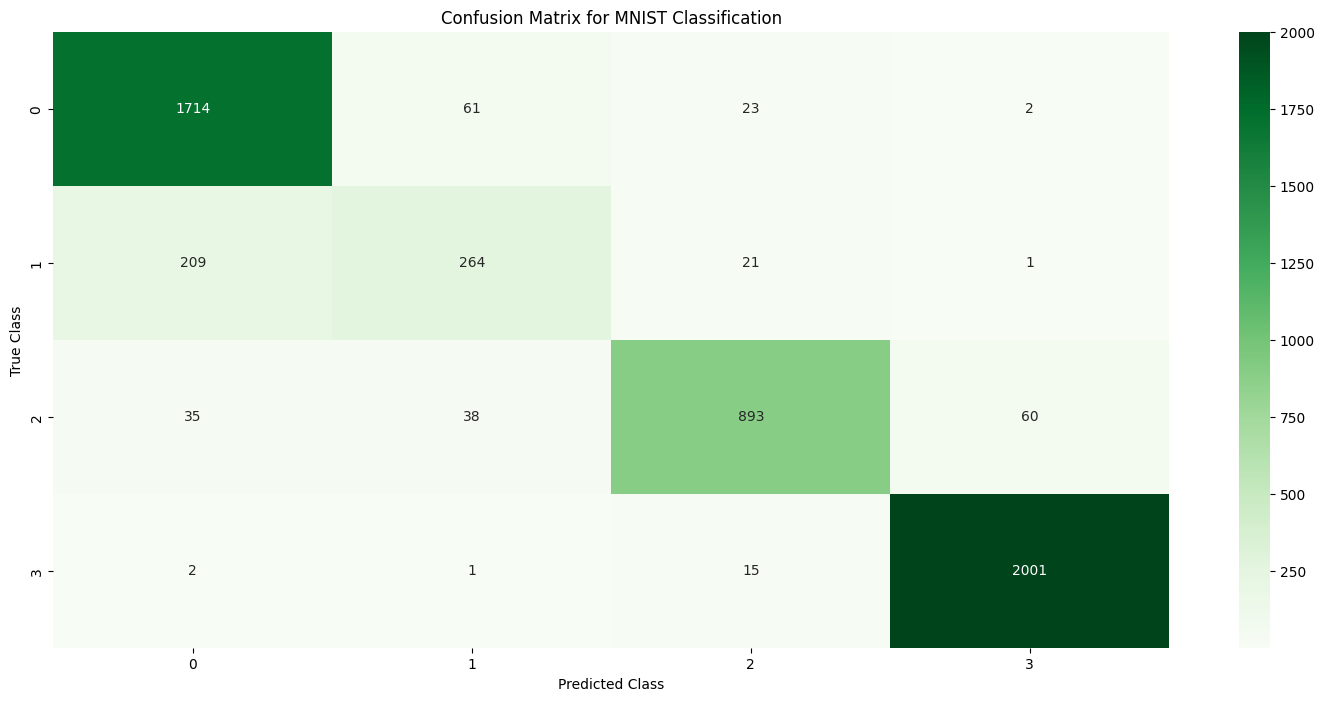

In [35]:
plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()